In [200]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
sns.set_theme()

<Axes: xlabel='x', ylabel='y'>

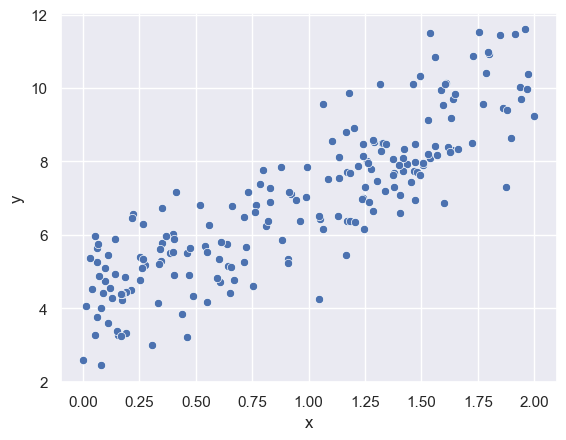

In [201]:
data = pd.DataFrame()

data["x"] = pd.read_csv("X.csv")
data["y"] = pd.read_csv("y.csv")

sns.scatterplot(data = data, x= "x" , y = "y")

In [202]:
x = data["x"].to_numpy()
y = data["y"].to_numpy()

In [203]:
len(x)

199

In [204]:
def run_mini_batch(theta, learning_rate, batch_size, x, y):
    indices = np.random.choice(len(x), size=batch_size, replace=False)
    x_subset = x[indices]
    y_subset = y[indices]

    x_b = np.c_[np.ones(batch_size), x_subset]

    gradients = 2/batch_size * np.dot(x_b.T, np.dot(x_b, theta) - y_subset)
    theta_n = theta - learning_rate*gradients
    
    return theta_n

In [205]:
def get_mean_squared_error(theta, x, y):
    y_pred = theta[0] + theta[1]*x
    mse = np.sum((y-y_pred)**2) / len(x)
    
    return mse

In [206]:
def plot_batch(theta, current_iter, n_iterations):
    x_pred = np.arange(0,3, 0.5)
    y_pred = theta[0] + theta[1]*x_pred
    y_pred
    
    if current_iter != n_iterations - 1:
        sns.lineplot(x = x_pred, y = y_pred, label = f"i = {current_iter}", color = "#4c72b0")
    else:
        sns.lineplot(x = x_pred, y = y_pred, label = f"i = {current_iter}", color = "magenta")

6.8884630484585205
3.5436378421177928
2.198247903344254
1.3708695812390173
1.255754410126732
1.212525265554832
1.2106669310855183
1.2446997875444568
1.2974696556185015
1.2647917339645112


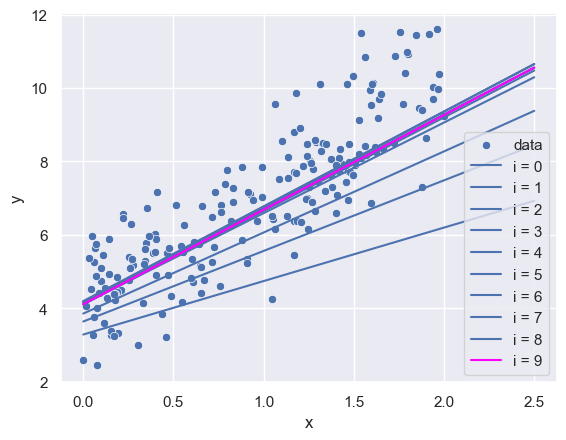

In [207]:
learning_rate = 0.1
batch_size = 10
m = batch_size
theta = np.random.randn(2)

n_iterations = 10

sns.scatterplot(data = data, x = "x", y = "y", label = "data")

for i in range(n_iterations):
    theta = run_mini_batch(theta, learning_rate, batch_size, x, y)
    plot_batch(theta, i, n_iterations)
    print(get_mean_squared_error(theta,x, y))